# Field Mapping Code Processing Demonstration Notebook

This notebook walks through the different processing steps necessary to load Sentinel-2 data (from raw zipped .SAFE files or from a prepared sample dataset) into an xarray dataset to be processed through the field mapping workflow. 

The core functions are stored in the fields_functions.py file, which references a file with global parameters, the global_config.py file, that stores parameters in a dictionary. Refer to that file to see what each parameter controls. Changing parameters can be done interactively in this notebook by reassigning new values to the parameter, such as: `config['prep_file_dir'] = 'path/to/directory/with/sentinel/tiles/'` 

Since there are multiple ways to load and process data, this notebook should not be run sequentially in full. The first step is loading the data. This can be done by using the `prep_data()` function to load data from a directory of zipped .SAFE Sentinel-2 L2A tiles. Since these tiles are large (about 1 GB per tile), the data is not directly available with the code. 

### Import packages

First, check the contents of the current working directory to make sure the python files with the functions and global parameters are accessible. Then, load import the fields_functions.py file. The config parameters are stored in the global_config.py, imported at the top of the fields_functions.py along with all the packages necessary for processing. 

In [1]:
import os
from glob import glob
from pprint import pprint

cwd = os.getcwd()
print(cwd)

py_files = glob('*.py')
print(py_files)

C:\Users\jesse\Documents\grad school\masters research\code\EveryField
['fields_functions.py', 'global_config.py']


In [2]:
### Import fields functions
from fields_functions import *

Let's take a look at the config parameters. The prefix for each parameter refers to the step in the processing workflow that corresponds with the parameters. For more detail about what each parameter controls, refer to the global_config.py file

In [3]:
pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 'auto',
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefi

### Changing global parameters
You can update the config dictionary interactively, too. Here, we change the base chunk size parameter. We can do this with any of the paramters within our notebook so that we do not have to change the global_config.py file directly.

In [4]:
### 
config['prep_base_chunk'] = 500
pprint(config)

{'kmeans_8var_clusters': True,
 'kmeans_from_full_tile_mask': False,
 'kmeans_mask_out_dir': 'mask_out_dir/',
 'kmeans_max_thresh': 0.3,
 'kmeans_min_thresh': 0,
 'kmeans_model_out_dir': 'kmeans_model_dir/',
 'kmeans_n_clusters': 15,
 'kmeans_ndwi_thresh': 0.2,
 'kmeans_range_thresh': 0.7,
 'kmeans_std_thresh': 0.2,
 'prep_apply_cloud_mask': True,
 'prep_base_chunk': 500,
 'prep_clip_outliers': True,
 'prep_clip_percentile': 1,
 'prep_cloud_coverage_thresh': 50,
 'prep_cloud_mask_thresh': 70,
 'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters '
                  'research/code/fields_library/data/rasters/from_MSI/',
 'prep_load_cloud_mask': True,
 'prep_manual_subset': True,
 'prep_normalize_bands': True,
 'prep_remove_overlap': False,
 'prep_step': 500,
 'prep_tile_id': 'TPT',
 'prep_time_chunk': 'auto',
 'prep_x_start': 7500,
 'prep_y_start': 7500,
 'preproc_cluster_tile': True,
 'preproc_n_clusters': 15,
 'preproc_out_dir': 'preproc_out_dir/',
 'preproc_outfile_prefix':

### Loading data

The prep_data() function expects the `'prep_data_dir'` parameter in the config dictionary to have zipped Sentinel-2 L2A tiles. L2A tiles have been preprocessed to estimate bottom of atmosphere pixel values, correcting for atmospheric aerosols. The metadata for L1C data is structured differently and does not work with the GDAL function to read the tile info. 

We will walk through how the prep_data() function works. 

If you do not have access to the full set of Sentinel-2 tiles, you can skip the prep_data() function call and load a sample of the data found in the google drive project folder here: https://drive.google.com/drive/folders/1n2tzO8I6EZQdkYzcB8L9omVsQDsb8eEh?usp=sharing

The sample data comes in four versions for an area in NW Minnesota from the T14TPT tile during the 2019 groing season: 500x500 pixels with and without cloud mask applied, and 1000x1000 pixel with and without cloud mask applied. To load the sample data, download the version of interest and fill in the sample_data_fp variable to point to where it is saved locally. Skip the next cell and run the cell to load the netCDF file directly into xarray. This should enable you to run the rest of the demo code.

In [5]:
### Check the file path to the directory with the zipped Sentinel-2 data
print(config['prep_file_dir'])

C:/Users/jesse/Documents/grad school/masters research/code/fields_library/data/rasters/from_MSI/


In [6]:
### Loaing data from a directory of zipped Sentinel-2 files
### Skip this step if you do not have a directory with Sentinel-2 tiles in it 
### Load the sample data in the cell below instead.

ds_time_stack = prep_data()

Cloud Coverage Threshold: 50
FAILED cloud coverage: 2019 05 03 with  99.009547 pct | nodata pixel pct: 0.126635
FAILED cloud coverage: 2019 05 06 with  72.591515 pct | nodata pixel pct: 5.957223
passed cloud coverage: 2019 05 13 with 34.97001 pct | nodata pixel pct: 0.134791
FAILED cloud coverage: 2019 05 16 with  72.077132 pct | nodata pixel pct: 5.796779
FAILED cloud coverage: 2019 05 23 with  96.121381 pct | nodata pixel pct: 0.149615
FAILED cloud coverage: 2019 05 26 with  73.563154 pct | nodata pixel pct: 5.719112
passed cloud coverage: 2019 06 02 with 21.420233 pct | nodata pixel pct: 0.193563
passed cloud coverage: 2019 06 05 with 3.328879 pct | nodata pixel pct: 5.51809
passed cloud coverage: 2019 06 12 with 3.1731840000000004 pct | nodata pixel pct: 0.164777
FAILED cloud coverage: 2019 06 15 with  91.997779 pct | nodata pixel pct: 5.732784
FAILED cloud coverage: 2019 06 22 with  95.609655 pct | nodata pixel pct: 0.121118
passed cloud coverage: 2019 06 25 with 31.59953999999999

### Visualize a band from the imagery

Let's take a look at the NIR band from one of the time steps in our raster stack. We named this object `ds_time_stack` because it is an xarray Dataset (ds) structure comprised of a stack of 4-band raster imagery across the time period of our study (May - October, 2019). We can use some built-in xarray methods to select the time based on an index value in the time dimension `.isel(time=8)` and select the NIR band via the data variable name `.nir` and then use the `.plot()` method to visualize the band via a matplotlib wrapper function.

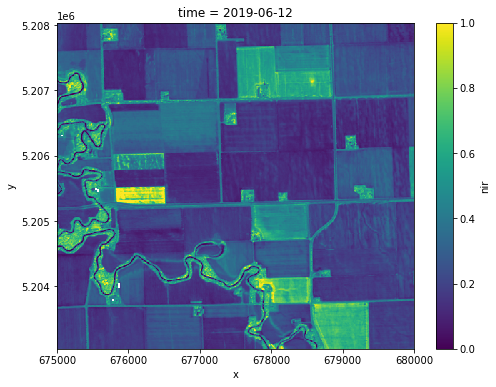

In [6]:
ds_time_stack.isel(time=6).nir.plot(figsize=(8,6))

### Prepare dataset functions

These functions construct an xarray DataSet object of the 10m resolution R, G, B, NIR bands of Sentinel-2 imagery
combined along the time dimension for a single tile footprint, referenced by the three letter tile ID.
It expects to read the data from .zip files of the Sentinel-2 .SAFE format from a directory on MSI.
Each tile footprint is processed separately. 

There is spatial overlap between neighboring tile footprints.There are two ways of addressing this built into the functions. 
Setting the 'prep_remove_overlap' parameter to True in the config dictionary will remove the overlapping area with the 
neighboring tile footprint by selecting 10,000 pixels in the x and y directions from the top left corner of the tile, 
resulting in a DataSet of dimension: (time steps, 10000, 10000). This DataSet is referred to as the time stack, or ds_time_stack, 
since it is a stack of the R, G, B, NIR rasters along the time dimension.

You can also manually select a spatial subset of the data by setting the 'prep_manual_subset' parameter to True,
and specifying the index of the first x value ('prep_x_start'), y value ('prep_y_start'), and number of pixels
to include in each direction ('prep_step'). This is useful for testing and development where code can run
much faster on smaller spatial subsets of the data, instead of on the full 10000 by 10000 pixel tile. It is 
also implemented for processing large areas when there are limits on memory. You can manually divide each tile
during processing and stitch the outputs back together if memory crashes when processing a full tile, which can 
happen when there are a lot of imagery dates. Leaving both the 'prep_remove_overlap' and 'prep_manual_subset' will
return the full tile footprint.

The xr_dict_to_dataset_cloud_mask() function also includes parameters for specifying the threshold for cloud coverage
on images being read into the time stack ('prep_cloud_coverage_thresh') and for applying the cloud mask from the 
Sentinel-2 data quality information. This cloud mask raster is 20m resolution, so it must be resampled to 10m to be
applied as a mask to the imagery bands. The 'prep_load_cloud_mask' boolean parameter specifies whether the cloud mask will be
loaded from the imagery data and the 'prep_apply_cloud_mask' boolean parameter specifies whether it will be applied to the 
imagery as a mask. These are generally the same and can be combined into a single parameter. The 'prep_cloud_mask_thresh' 
parameter sets the threshold value for the cloud mask, which is a probability of the pixel being cloudy, in order to 
use it as a binary mask on the imagery. The mask tends to be conservative, missing some cloudy pixels.

This data prep process clips outliers from each band, sets the nodata values to NAN (they are 0 in the raw data), 
and clips outliers based on percentile from each imagery band. If you do not want to clip the outliers, set the 
'prep_clip_outliers' parameter to False in the cofig dictionary. The 'prep_clip_percentile' parameter specifies 
what percentile to clip for the outliers. Usually, 1% is sufficient to remove outlier pixels that can cause issues.

This process happens lazily and will not load the data until the output of an operation done on the DataSet is needed. 
The data is normalized for each variable (band) in the dataset by specifying the 'prep_normalize_bands' boolean parameter
in the config dictionary. This normalizes the data by the full time series, not by the individual time step. To normalize
each time step individually, move the normalization function into the end of the xr_dict_to_dataset_cloud_mask() function.
Nodata values are set to NaN.

#### Code Reorganizing Notes:
- The code currently only works with Sentinel-2 Level 2A data (bottom of atmosphere) and hits an error parsing the metadata
  when trying to read Level 1C (top of atmosphere) data.

In [8]:
"""
Config variables:
"""
prep_config = {'prep_file_dir': 'C:/Users/jesse/Documents/grad school/masters research/code/fields_library/data/rasters/from_MSI/', # dir with sentinel tiles
              'prep_tile_id': 'TPT',            # three letter tile ID for tile being processed
              'prep_base_chunk': 'auto',        # chunk size for x and y dimenstions
              'prep_time_chunk': 'auto',        # chunk size along the time dimension
              'prep_remove_overlap': False,     # Set to true to load 10000 by 10000 tile
              'prep_manual_subset': True,       # If prep_remove_overlap is True, set this to False. This will select spatial subset
              'prep_x_start': 0,                # This sets the start index for the x value
              'prep_y_start': 0,                # this sets the start index for the y value
              'prep_step': 500,                 # this sets the number of pixels to include in the spatial subset in the x and y dimensions
              'prep_cloud_coverage_thresh': 50, # this sets the cloud coverage threshold for reading in images
              'prep_load_cloud_mask': True,     # this specifies whether to load the cloud mask layer
              'prep_apply_cloud_mask': True,    # this specifies whether to apply the cloud mask layer to the imagery bands
              'prep_cloud_mask_thresh': 70,     # this specifies what cloud probability value to use for binarizing the cloud mask
              'prep_clip_percentile': 2}        # this specifies what percentage of values on either end of the histogram to clip for each band


## How does the prep_data() function actually work?

### Step 1: get metadata from the imagery tiles

The first thing we do is get a list of the .zip files in the directory where the Sentinel-2 data is saved. This is designed to read the tiles from the MSI directory, where they are stored as zipped .SAFE files. 

Then, we can loop through each .zip file and pass it to the `xr_get_zip_info_to_dict()` function which will extract all the useful metadata from the .zip file and add it to a dictionary. We can see what that metadata is in the cell below by calling it on a single .zip file. Then in the cell below, we loop through all the .zip files and append the metadata dictionary to a master dictionary to store all the information.

In [13]:
# def prep_data():
#     # set variables from global config
#     global config

# file dir
file_dir = config['prep_file_dir']
tile_id = config['prep_tile_id']
# chunking
base_chunk = config['prep_base_chunk']
time_chunk = config['prep_time_chunk']
chunk_size = (time_chunk, base_chunk, base_chunk)
rechunk_size = {'time': time_chunk, 'x': base_chunk, 'y': base_chunk}
# data read parameters
cloud_coverage_thresh = config['prep_cloud_coverage_thresh']
load_cloud_mask = config['prep_load_cloud_mask']
apply_cloud_mask = config['prep_apply_cloud_mask']
cloud_mask_thresh = config['prep_cloud_mask_thresh']
overlap_bool = config['prep_remove_overlap']
manual_subset = config['prep_manual_subset']
x_start = config['prep_x_start']
y_start = config['prep_y_start']
step = config['prep_step']
clip_outliers = config['prep_clip_outliers']
percentile = config['prep_clip_percentile']
normalize = config['prep_normalize_bands']


# Set file_dir in the global variables at top of the code
os.chdir(file_dir)
glob_str = "*" + tile_id + "*.zip"
zip_list = glob.glob(glob_str)

print(zip_list[0])

sample_zip_info_dict = xr_get_zip_info_to_dict(zip_list[0])

pprint(sample_zip_info_dict)

S2A_MSIL2A_20190503T171901_N0211_R012_T14TPT_20190503T214509.zip
{'S2A_MSIL2A_20190503T171901_N0211_R012_T14TPT_20190503T214509': {'cloud_coverage': 99.009547,
                                                                  'cloud_mask_str': '/vsizip/S2A_MSIL2A_20190503T171901_N0211_R012_T14TPT_20190503T214509.zip/S2A_MSIL2A_20190503T171901_N0211_R012_T14TPT_20190503T214509.SAFE/GRANULE/L2A_T14TPT_A020172_20190503T172731/QI_DATA/MSK_CLDPRB_20m.jp2',
                                                                  'date_obj': datetime.datetime(2019, 5, 3, 0, 0),
                                                                  'date_str': '20190503',
                                                                  'epsg': 'EPSG_32614',
                                                                  'gdal_str': 'SENTINEL2_L2A:/vsizip/S2A_MSIL2A_20190503T171901_N0211_R012_T14TPT_20190503T214509.zip/S2A_MSIL2A_20190503T171901_N0211_R012_T14TPT_20190503T214509.SAFE/MTD_MSIL2A.xml:10m:

In [14]:
# build dictionary of metadata from gdal_info calls for each tile in the list of zip_files
tile_info_dict = {}
for zip_str in zip_list:
    tile_info_dict.update(xr_get_zip_info_to_dict(zip_str))

#### xr_get_zip_info_to_dict() function

The function is below. Mostly, it uses a `gdal.Info()` method to extract metadata from the .xml file within the zipped .SAFE file and extracts info from the file name via string indexing.

In [ ]:
def xr_get_zip_info_to_dict(zip_file):
    """
    Builds a dictionary of metadata from zipped sentinel tiles to pass 
    to the function that opens the data into an xarray dataset.
    Expects a list of zipped sentinel tiles and 
    an epsg code (which needs to be consistent for all tiles)
    in the format: "EPSG_32614", which can be identified from calling !gdalinfo
    """
    ### Info from file name
    file_name = zip_file[:-4]
    tile_id = zip_file[-26:-20]
    date_str = zip_file[-19:-11]
    date_obj = datetime.datetime.strptime(date_str, '%Y%m%d')
    platform = zip_file[:3]
    prod_level = zip_file[7:10]
    
    # info from gdal_info
    gdal_info = gdal.Info(zip_file, format='json')
    # set GDAL call for 10m bands in zip tile directory
    gdal_str = gdal_info['metadata']['SUBDATASETS']['SUBDATASET_1_NAME']
    epsg = gdal_str[-10:]
    cloud_coverage = float(gdal_info['metadata']['']['CLOUD_COVERAGE_ASSESSMENT'])
    nodata_pixel_percentage = float(gdal_info['metadata']['']['NODATA_PIXEL_PERCENTAGE'])
    
    ### Get string for cloud mask iamge
    # Get contents of zip file as a list
    zip_contents = zipfile.ZipFile(zip_file, 'r')
    # path to 20m cloud mask within the zipped file
    cld_path = [s for s in zip_contents.namelist() if "MSK_CLDPRB_20m.jp2" in s]
    # create string to call cloud mask .jp2 from zipped file with rasterio
    cld_mask_str = "/vsizip/" + zip_file + "/" + cld_path[0]

    # return dict of tile info with top level key: file name
    info_dict = {file_name: {'tile_id':tile_id,
                             'date_str':date_str,
                             'date_obj':date_obj,
                             'gdal_str':gdal_str,
                             'epsg':epsg,
                             'cloud_coverage':cloud_coverage,
                             'nodata_pixel_percentage':nodata_pixel_percentage,
                             'platform':platform,
                             'product_level':prod_level,
                             'cloud_mask_str':cld_mask_str}}
    
    return info_dict

### Step 2: Load the data into xarray data strauctures

Now that we have a way to get metadata from the tiles, we can use that information to select which imagery snapshots we want to include in the analysis based on cloud coverage. In the next step of the `prep_data()` function, we set a cloud coverage threshold and loop through each tile in the dictionary of metadata. If the tile has a lower cloud coverage than the threshold, the metadata dictionary for that tile gets passed to the `xr_dict_to_dataset_cloud_mask()` function, which uses the `xr.open_rasterio()` function and the `gdal_str` value from the dictionary to read the imagery into a xr.Dataset structure. On the first instance of a tile meeting the cloud coverage threshold, that tile instantiates the ds_time_stack object and subsequent tiles are concatenated to that dataset. 

In [16]:
# date list to hold date objects of time slices in the data stack in order to avoid duplicate dates
### FIX ME : there should be a better long-term solution to select the best image if there are two from the same date instead of the first one that the code sees
date_list=[]
count_cloud_pass = 0
count_total_files = 0
print("Cloud Coverage Threshold:", cloud_coverage_thresh)
for k, v in tile_info_dict.items():
    if v['cloud_coverage'] < cloud_coverage_thresh:
        # Print tile info
        print("passed cloud coverage:", v['date_str'][:4],v['date_str'][4:6],v['date_str'][6:], "with", v['cloud_coverage'], "pct | nodata pixel pct:", v['nodata_pixel_percentage'] )
        # if this is the first tile to pass the cloud coverage thresh, define it as ds_time_stack
        if count_cloud_pass == 0:
            ds_time_stack = xr_dict_to_dataset_cloud_mask(k,v['gdal_str'],v['date_obj'],v['tile_id'], v['cloud_mask_str'], 
                                                          load_cloud_mask = load_cloud_mask, apply_cloud_mask = apply_cloud_mask, cloud_mask_thresh = cloud_mask_thresh,
                                                          chunks=chunk_size, remove_overlap=overlap_bool,
                                                          manual_subset = manual_subset, x_start = x_start, y_start = y_start, step = step)

            date_list.append(v['date_obj'])

        # if not the first tile
        if count_cloud_pass > 0:
            # if a tile with the same date is already in the ds_time_stack, then skip this tile because there can't be two tiles with the same time dim 
            ### QUESTION : is it faster to just reference ds_time_stack.coords['time'] for monitoring duplicates?
            ### EXAMPLE: if v['date_obj'] in ds_time_stack.coords['time']:
            if v['date_obj'] in date_list:
                continue
            ds_time_stack = xr.concat([ds_time_stack,
                                       xr_dict_to_dataset_cloud_mask(k,v['gdal_str'],v['date_obj'],v['tile_id'], v['cloud_mask_str'],
                                                                     load_cloud_mask = load_cloud_mask, apply_cloud_mask = apply_cloud_mask, cloud_mask_thresh = cloud_mask_thresh,
                                                                     chunks=chunk_size, remove_overlap=overlap_bool,
                                                                     manual_subset = manual_subset, x_start = x_start, y_start = y_start, step = step)], 
                                                                     dim = 'time')
            date_list.append(v['date_obj'])
        # Add to the count so that subsequent tiles are concatenated with ds_time_stack instead of overwriting it
        count_cloud_pass += 1

    else:
        print("FAILED cloud coverage:", v['date_str'][:4],v['date_str'][4:6],v['date_str'][6:], "with ", v['cloud_coverage'],  "pct | nodata pixel pct:", v['nodata_pixel_percentage'] )
    count_total_files += 1
print(count_cloud_pass, "out of", count_total_files, "time steps passed cloud coverage threshold")
### QUESTION : Is this the best way to handle an empty ds_time_stack?
if count_cloud_pass == 0:
    print("no tiles below cloud threshold")

Cloud Coverage Threshold: 50
FAILED cloud coverage: 2019 05 03 with  99.009547 pct | nodata pixel pct: 0.126635
FAILED cloud coverage: 2019 05 06 with  72.591515 pct | nodata pixel pct: 5.957223
passed cloud coverage: 2019 05 13 with 34.97001 pct | nodata pixel pct: 0.134791
FAILED cloud coverage: 2019 05 16 with  72.077132 pct | nodata pixel pct: 5.796779
FAILED cloud coverage: 2019 05 23 with  96.121381 pct | nodata pixel pct: 0.149615
FAILED cloud coverage: 2019 05 26 with  73.563154 pct | nodata pixel pct: 5.719112
passed cloud coverage: 2019 06 02 with 21.420233 pct | nodata pixel pct: 0.193563
passed cloud coverage: 2019 06 05 with 3.328879 pct | nodata pixel pct: 5.51809
passed cloud coverage: 2019 06 12 with 3.1731840000000004 pct | nodata pixel pct: 0.164777
FAILED cloud coverage: 2019 06 15 with  91.997779 pct | nodata pixel pct: 5.732784
FAILED cloud coverage: 2019 06 22 with  95.609655 pct | nodata pixel pct: 0.121118
passed cloud coverage: 2019 06 25 with 31.59953999999999

#### xr_dict_to_dataset_cloud_mask() function

This function takes a lot of parameters as inputs, which are all derived from the global_config dictionary.

This function works by creating an xarray DataArray by using the `xr.open_rasterio()` function, which is a wrapper around raster.io, which is a wrapper around GDAL. It uses the string from the `gdal.Info()` method used to populate the `gdal_str` value in the metadata `info_dict`. Xarray collects the spatial coordinates as a coordinate value for the x and y dimensions and the spatial transformation data,which gets stored as an attribute in the xr.DataArray structure. This makes combining tiles and saving out spatially referenced data very easy. 

This function also loads the cloud mask, which is a 20m resolution raster within the .SAFE Sentinel-2 file structure. It resamples the cloud mask to 10m so that it can be applied directly to the 10m imagery data. 

Another important feature of this function is the spatial subsetting. There are two ways to select the spatial area to load from the raw imagery. Using the `remove_overlap` boolean parameter allows for the removal of the spatial overlap between neighboring tile footprints. Sentinel-2 tiles have about a 10km overlap on each side of the tile with neighboring tiles based on how the imagery is gridded. Passing a `True` value to the `remove_overlap` parameter selects a 10,000 by 10,000 pixel area from the top left, removing the overlap with the neighboring tiles on the right and bottom. 

You can also specify a smaller area to load from the imagery with the `manual_subset` parameter. By setting `manual_subset` to `True` and `remove_overlap` to `False`, you can specify the starting index position in the x dimension `x_start` and y dimension `y_start` and the number of pixels in each dimension to load into the dataset via the `step` parameter. I think the x and y dimensions are flipped, but it stil works. I would recommend visualizing the area and checking the coordinates of the dataset if you are looking to load the imagery over a specific area.

Finally, the function loads the cloud mask, applies it to the imagery and then converts the DataArray into a Dataset, which can be more easily integrated along the time dimension with the other imagery snapshots. To utilize the cloud masking functionality, set the `load_cloud_mask` parameter to `True`, which loads the cloud mask layer from the tile data, and set the `apply_cloud_mask` parameter to `True` to apply the cloud mask to the imagery. This could be simplified into a single boolean parameter.

One other thing to note: the `prep_offset` variable is used to add a few buffer pixels while the imagery is loaded and the cloud mask is applied because without some buffer area, the cloud mask ends up with a row of NaN pixels along the bottom and right edges of the image after it gets upsampled to 10m. To avoid these seams in the imagery which will impact the outputs, there is a temporary buffer used during the masking process.

This function shows a few useful ways to index and select data within the xarray data structures.

In [ ]:
### Pass tile information (gdal_str) to open file to xr.dataset and place object in ds_list
### With remove_overlap set to True, the function selects by x,y extent to remove right and bottom overlap with neighboring tiles
### The total pixel overlap in each direction with the right and bottom neighbors is 983 pixels,
### based on the difference in initial coordinates (top left) from the rasterio objects
def xr_dict_to_dataset_cloud_mask(da_name, gdal_str, date_obj, tile_id, cld_mask_str,
                                  load_cloud_mask = False, apply_cloud_mask = False, cloud_mask_thresh = 30,
                                  chunks=(-1,1000,1000), remove_overlap = True,
                                  manual_subset = False, x_start = 0, y_start = 0, step = 1000):
    """
    Pass tile information (gdal_str) to open file to xr.dataset and place object in ds_list
    With remove_overlap set to True, the function selects by x,y extent to remove right and bottom overlap with neighboring tiles
    The total pixel overlap in each direction with the right and bottom neighbors is 983 pixels,
    based on the difference in initial coordinates (top left) from the rasterio objects
    
    parameters:
        da_name - xr DataArray name, needed to load in imagery from info_dict via xr_get_zip_info_to_dict()
        gdal_str - string to read the 10m bands from zipped tile from info_dict via xr_get_zip_info_to_dict()
        date_obj - date of imagery formatted as datetime obj from info_dict via xr_get_zip_info_to_dict()
        tile_id - Sentinel tile ID from info_dict via xr_get_zip_info_to_dict()
        cld_mask_str - path to cloud mask in zipped tile from info_dict via xr_get_zip_info_to_dict()
        
        load_cloud_mask - Boolean to load the cloud mask raster
        apply_cloud_mask - Boolean to apply cloud mask to RGBN bands
        cloud_mask_thresh - int to set threshold for cloud mask probability
        
        chunks - (time dim dask chunks, x dim dask chunks, y dim dask chunks) via config
        remove_overlap - Boolean to spatially subset the tile to remove the overlapping area with neighboring tile
        manual_subset - Boolean to assign manual spatial subset, used for manual chunking or testing
        x_start - int to assign first x value, left edge of the subset
        y_start - int to assign first y value, top edge of the subset
        step - int to assign how many pixels in each direction (x, y) of the manual subset
        
    """    

    ### Define offset for cleaning up seams in cloud masking, can be an arbitrary number larger than 1, should be even and relatively small
    prep_offset = 10
    
    # Lazily read file to xarray DataArray    
    rio_da = xr.open_rasterio(gdal_str, chunks=chunks)
    # set time coordinate
    rio_da['time'] = date_obj  
    # set da name
    rio_da.name = da_name
    # set tile_id
    rio_da.attrs['tile_id'] = tile_id    
    
    if load_cloud_mask:
        # Get cloud mask
        cld_mask_da = xr.open_rasterio(cld_mask_str, chunks=('auto','auto'))
        cld_mask_da['time'] = date_obj
        cld_mask_da = cld_mask_da.where(cld_mask_da > cloud_mask_thresh, 0) 
        cld_mask_da.name = 'cloud_mask'
        cld_mask_da = cld_mask_da.astype(bool).astype(int)
    
    # this removes the area overlapping with the neighboring tile on the right and bottom
    # The overlap is 983 pixels, but using 980 results in a clean 10000 by 10000 pixel tile
    if remove_overlap:
        rio_da = rio_da[:,:-980+prep_offset,:-980+prep_offset]
        if load_cloud_mask:
            cld_mask_da = cld_mask_da[:,:-490+(prep_offset/2),:-490+(prep_offset/2)]

    if manual_subset:
        # Just for processing in manual batches
        x = x_start
        y = y_start       
        x_end = x + step + prep_offset
        y_end = y + step + prep_offset 
        rio_da = rio_da[:, x:x_end, y:y_end]
        if load_cloud_mask:
            cld_mask_da = cld_mask_da[:,int(x/2):int(x_end/2), int(y/2):int(y_end/2)]      

    if load_cloud_mask:
        # Resample cloud mask to 10m resolution to work with imagery bands
        cld_mask_da = cld_mask_da.interp_like(rio_da.isel(band=0), method='linear')        
        cld_mask_da = cld_mask_da.isel(band=0).fillna(0)
        cld_mask_da = cld_mask_da.chunk(chunks=('auto','auto')).drop('band').astype(bool)
        cld_mask_da = np.invert(cld_mask_da)
    
    # convert imagery to dataset
    ds = rio_da.to_dataset(dim='band')
    ds = ds.rename_vars({1:'red',
                         2:'green',
                         3:'blue',
                         4:'nir'})
    
    # Apply cloud mask to bands
    if apply_cloud_mask:
        ds['red'] = ds['red'].where(cld_mask_da)
        ds['green'] = ds['green'].where(cld_mask_da)
        ds['blue'] = ds['blue'].where(cld_mask_da)
        ds['nir'] = ds['nir'].where(cld_mask_da)
    
    if remove_overlap:
        ds = ds[dict(x=slice(0,10000), y=slice(0,10000))].chunk(chunks={'x':'auto','y':'auto'})
    
    if manual_subset:
        x = x_start
        y = y_start       
        x_end = x + step
        y_end = y + step
        ds = ds[dict(x=slice(0,step), y=slice(0,step))].chunk(chunks={'x':'auto','y':'auto'})
    
    return ds

### Step 3: Clean up the Dataset with the full stime stack of imagery

Now that we've loaded each tile, applied the cloud mask, and combined them into a single Dataset, we need to do a little clean up. The final step in the `prep_data()` function is to sort the ds_time_stack along the time dimension, set NaN values (since they are read in as 0), and then clip outliers and normalize each band. 

We utilize the `.map()` functionality of xarray to map a function to each of the data variables in the dataset. This is an efficient way to pass a function to all the data in a dataset and (I think) it automatically parallelizes the computation as long as the data variables in the Dataset are stored as dask arrays. This is accomplished by passing a `chunk` method to the dataset object or by using a `chunks` parameter during the `xr.open_rasterio()` function. 

In [17]:
ds_time_stack = ds_time_stack.chunk(chunks=rechunk_size).sortby('time')

# Clip each band in each of the time steps to remove outliers
# set 0 values to NaN since missing data is read in as 0
ds_time_stack = ds_time_stack.map(zero_to_nan_ufunc, keep_attrs = True)
# Clip outlier values in each band
if clip_outliers:
    ds_time_stack = ds_time_stack.map(clip_nan_ufunc, percentile=percentile, keep_attrs = True)
# Normalize each band
if normalize:
    ds_time_stack = xr.Dataset.chunk(ds_time_stack.map(normalize_ufunc, keep_attrs=True), 
                                     chunks=rechunk_size)

print(ds_time_stack)    
return ds_time_stack

<xarray.Dataset>
Dimensions:  (time: 30, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.225e+06 5.225e+06 5.225e+06 ... 5.22e+06 5.22e+06
  * time     (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
Attributes:
    transform:     (10.0, 0.0, 600000.0, 0.0, -10.0, 5300040.0)
    crs:           +init=epsg:32614
    res:           (10.0, 10.0)
    is_tiled:      1
    nodatavals:    (nan, nan, nan, nan)
    scales:        (1.0, 1.0, 1.0, 1.0)
    offsets:       (0.0, 0.0, 0.0, 0.0)
    descriptions:  ('B4, central wavelength 665 

SyntaxError: 'return' outside function (<ipython-input-17-22a806360d17>, line 15)

In [ ]:
def prep_data():
    # set variables from global config
    global config
    # file dir
    file_dir = config['prep_file_dir']
    tile_id = config['prep_tile_id']
    # chunking
    base_chunk = config['prep_base_chunk']
    time_chunk = config['prep_time_chunk']
    chunk_size = (time_chunk, base_chunk, base_chunk)
    rechunk_size = {'time': time_chunk, 'x': base_chunk, 'y': base_chunk}
    # data read parameters
    cloud_coverage_thresh = config['prep_cloud_coverage_thresh']
    load_cloud_mask = config['prep_load_cloud_mask']
    apply_cloud_mask = config['prep_apply_cloud_mask']
    cloud_mask_thresh = config['prep_cloud_mask_thresh']
    overlap_bool = config['prep_remove_overlap']
    manual_subset = config['prep_manual_subset']
    x_start = config['prep_x_start']
    y_start = config['prep_y_start']
    step = config['prep_step']
    clip_outliers = config['prep_clip_outliers']
    percentile = config['prep_clip_percentile']
    normalize = config['prep_normalize_bands']
    
    # set working directory to the folder with the sentinel data tiles
    # Set file_dir in the global variables at top of the code
#    os.chdir(file_dir)
    glob_str = "*" + tile_id + "*.zip"
    zip_list = glob.glob(file_dir + glob_str)
    
    # build dictionary of metadata from gdal_info calls for each tile in the list of zip_files
    tile_info_dict = {}
    for zip_str in zip_list:
        tile_info_dict.update(xr_get_zip_info_to_dict(zip_str))

    # date list to hold date objects of time slices in the data stack in order to avoid duplicate dates
    ### FIX ME : there should be a better long-term solution to select the best image if there are two from the same date instead of the first one that the code sees
    date_list=[]
    count_cloud_pass = 0
    count_total_files = 0
    print("Cloud Coverage Threshold:", cloud_coverage_thresh)
    for k, v in tile_info_dict.items():
        if v['cloud_coverage'] < cloud_coverage_thresh:
            # Print tile info
            print("passed cloud coverage:", v['date_str'][:4],v['date_str'][4:6],v['date_str'][6:], "with", v['cloud_coverage'], "pct | nodata pixel pct:", v['nodata_pixel_percentage'] )
            # if this is the first tile to pass the cloud coverage thresh, define it as ds_time_stack
            if count_cloud_pass == 0:
                ds_time_stack = xr_dict_to_dataset_cloud_mask(k,v['gdal_str'],v['date_obj'],v['tile_id'], v['cloud_mask_str'], 
                                                              load_cloud_mask = load_cloud_mask, apply_cloud_mask = apply_cloud_mask, cloud_mask_thresh = cloud_mask_thresh,
                                                              chunks=chunk_size, remove_overlap=overlap_bool,
                                                              manual_subset = manual_subset, x_start = x_start, y_start = y_start, step = step)
                                
                date_list.append(v['date_obj'])
                
            # if not the first tile
            if count_cloud_pass > 0:
                # if a tile with the same date is already in the ds_time_stack, then skip this tile because there can't be two tiles with the same time dim 
                ### QUESTION : is it faster to just reference ds_time_stack.coords['time'] for monitoring duplicates?
                ### EXAMPLE: if v['date_obj'] in ds_time_stack.coords['time']:
                if v['date_obj'] in date_list:
                    continue
                ds_time_stack = xr.concat([ds_time_stack,
                                           xr_dict_to_dataset_cloud_mask(k,v['gdal_str'],v['date_obj'],v['tile_id'], v['cloud_mask_str'],
                                                                         load_cloud_mask = load_cloud_mask, apply_cloud_mask = apply_cloud_mask, cloud_mask_thresh = cloud_mask_thresh,
                                                                         chunks=chunk_size, remove_overlap=overlap_bool,
                                                                         manual_subset = manual_subset, x_start = x_start, y_start = y_start, step = step)], 
                                                                         dim = 'time')
                date_list.append(v['date_obj'])
            # Add to the count so that subsequent tiles are concatenated with ds_time_stack instead of overwriting it
            count_cloud_pass += 1
            
        else:
            print("FAILED cloud coverage:", v['date_str'][:4],v['date_str'][4:6],v['date_str'][6:], "with ", v['cloud_coverage'],  "pct | nodata pixel pct:", v['nodata_pixel_percentage'] )
        count_total_files += 1
    print(count_cloud_pass, "out of", count_total_files, "time steps passed cloud coverage threshold")
    ### QUESTION : Is this the best way to handle an empty ds_time_stack?
    if count_cloud_pass == 0:
        print("no tiles below cloud threshold")
    
    ### Rechunk the full dataset and sort by time dimension
    ds_time_stack = ds_time_stack.chunk(chunks=rechunk_size).sortby('time')
    
    # Clip each band in each of the time steps to remove outliers
    # set 0 values to NaN since missing data is read in as 0
    ds_time_stack = ds_time_stack.map(zero_to_nan_ufunc, keep_attrs = True)
    # Clip outlier values in each band
    if clip_outliers:
        ds_time_stack = ds_time_stack.map(clip_nan_ufunc, percentile=percentile, keep_attrs = True)
    # Normalize each band
    if normalize:
        ds_time_stack = xr.Dataset.chunk(ds_time_stack.map(normalize_ufunc, keep_attrs=True), 
                                         chunks=rechunk_size)
    
    print(ds_time_stack)    
    return ds_time_stack

### Loading sample data
Here, we will load the prepared sample data for a 500x500 pixel area in northwest Minnesota by reading the netCDF file directly into an xarray dataset. This is the same as the prep_data() output but for a smaller spatial area. When we read in the data with `xr.open_dataset()` be sure to include the `chunks` argument to coerce the data into dask arrays, which enable parallel processing during the analysis steps. Here, we use the `'auto'` argument to allow xarray to automatically assign an appropriate chunk size to each of the three dimensions: x, y, and time.

In [5]:
### Loading sample data directly from netCDF file

# filepath to the sample data
# sample_data_fp = 'C:/Users/jesse/Documents/grad school/masters research/code/fields_library/thesis_code_cleanup/sample_data/sample_data_TPT_px500_cldcov40_cldmask.nc'
sample_data_fp = 'sample_data/sample_data_TPT_px500_cldcov40_cldmask.nc'


### In order to utilize parallel processing with dask within xarray, make sure to set a chunk size when reading in the data.
### You can use the keywork 'auto' to have dask automatically set a chunk size based on data size and memory limitations
ds_time_stack = xr.open_dataset(sample_data_fp, chunks={'x':'auto', 'y':'auto','time':'auto'})
print(ds_time_stack)

<xarray.Dataset>
Dimensions:  (time: 30, x: 500, y: 500)
Coordinates:
  * x        (x) float64 6.75e+05 6.75e+05 6.75e+05 ... 6.8e+05 6.8e+05 6.8e+05
  * y        (y) float64 5.208e+06 5.208e+06 5.208e+06 ... 5.203e+06 5.203e+06
  * time     (time) datetime64[ns] 2019-05-13 2019-05-31 ... 2019-10-28
Data variables:
    red      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    green    (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    blue     (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
    nir      (time, y, x) float64 dask.array<chunksize=(30, 500, 500), meta=np.ndarray>
Attributes:
    transform:     [ 1.00000e+01  0.00000e+00  6.00000e+05  0.00000e+00 -1.00...
    crs:           +init=epsg:32614
    res:           [10. 10.]
    is_tiled:      1
    nodatavals:    [nan nan nan nan]
    scales:        [1. 1. 1. 1.]
    offsets:       [0. 0. 0. 0.]
    descriptions:  ['B4, central wavelength 665 n